In [1]:
imatlab_export_fig('print-png')

# Quadrature rules for 2.5-D resistivity modelling

We consider the evaluation of the integral

$$
\Phi(x, y, z) = \frac{2}{\pi} \int_0^\infty \tilde\Phi(k, y, z) \cos(k x)\, dk
$$
where 
$$
\tilde\Phi(k, y, z) = K_0\left({k}{\sqrt{y^2 + z^2}}\right).
$$

The function $\tilde\Phi$ exhibits a different asymptotic behaviour depending on the magnitude of the argument, i.e., with $u := kr$

$$
u\to 0: K_0(u) \to -\ln(u)
$$
and
$$
u \to \infty: K_0(u) \to \frac{e^{-u}}{\sqrt{u}}.
$$

For a fixed distance $r = \sqrt{y^2 + z^2} = 1$ and $10^{-6} \le k \le 10^1$, we obtain the following figure:

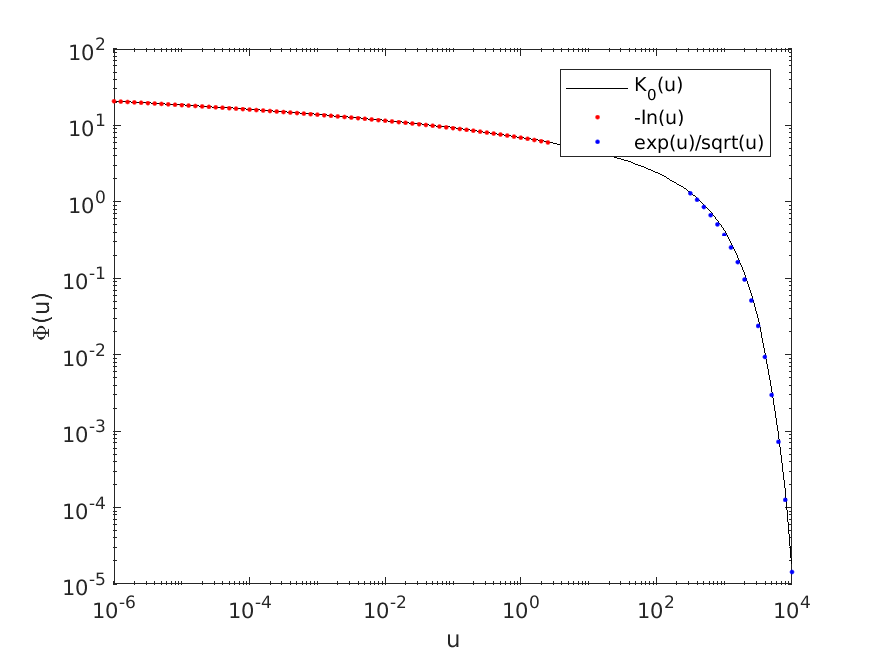

In [17]:
k = logspace(-6, 4, 101);
kk = 1e-3;
u = besselk(0, k * kk);
padln = 65;
padexp = 15;
loglog(k, u, 'k', k(1:padln), -log(kk * k(1:padln)), 'r.', ...
    k(end-padexp:end), exp(-kk * k(end-padexp:end))./sqrt(kk * k(end-padexp:end)), 'b.')

legend('K_0(u)', '-ln(u)', 'exp(-u)/sqrt(u)')
ylabel('\Phi(u)')
xlabel('u')

We split the integration at $k = k_0$, $0 < k_0 < \infty$.
We obtain
$$
\int_0^\infty \tilde\Phi(k)\,dk = \int_0^{k_0}\tilde\Phi(k)\,dk   + \int_{k_0}^\infty\tilde\Phi(k)\,dk.
$$

### Gauss-Legendre quadrature
To avoid the singularity at $k \to 0$ for the first integral, we substitute $k'=\sqrt{k / k_0}$ and obtain with $dk = 2 k_0 k' dk'$
$$
\int_0^{k_0}\tilde\Phi(k)\,dk = \int_0^1 g(k')\,dk' \approx \sum_{n=1}^N w_n' g(k_n') = \sum_{n=1}^N w_n \tilde\Phi(k_n)
$$
with $w_n = 2 k_0 k_n' w_n' $ and $k_n = k_0 k_n'^2$.

### Gauss-Laguerre quadrature
For the second integral, we substitute $k' = k / k_0 - 1$, define $g(k') = k_0 \tilde\Phi(k)e^{k'}$, and obtain
$$
\int_{k_0}^\infty\tilde\Phi(k)\,dk = \int_0^\infty e^{-k'} g(k')\,dk' \approx \sum_{n=1}^N w_n' g(k_n') = \sum_{n=1}^N w_n \tilde\Phi(k_n)
$$
with $w_n = k_0 e^{k_n'}w_n'$ and $k_n = k_0 (k_n'+1)$.

### Choice of $k_0$

The actual value of $k_0$ depends on the smallest electrode spacing $r_{min}$.
More precisely, $k_0 = (2 r_{min})^{-1}$.

## Numerical test

In the case of a point electrode with current $I$ located at $\mathbf r' = (x', y', 0)^\top$ at the surface of a homogeneous halfspace with resistivity $\rho$, we obtain for the electric potential at point $\mathbf r = (x, y, z)^\top$
$$
\Phi(\mathbf  r) = \dfrac{\rho I}{2 \pi |\mathbf r - \mathbf r'|}.
$$

We try to approximate the inverse Cosine transform
$$
\Phi(x, y, z) = \frac{2}{\pi} \int_0^\infty \tilde\Phi(k, y, z) \cos(k x)\, dk
$$
for the special case of $x = 0$ ($\cos(0) = 1$) by means of the Gauss quadrature rules introduced above.

For the smallest electrode spacing of, e.g., $|\mathbf r - \mathbf r'| = r_{min} = 1$ we would set $k_0 = 0.5$.

In [3]:
rmin = 1;
rp = rmin:1:100;
rp = rp(:);
k0 = 1 / (2 * rmin);
[x1, w1] = gauleg(0, 1, 17);
[x2, w2] = gaulag(7);
kn1 = k0 * x1 .* x1;
wn1 = 2 * k0 * x1 .* w1;
kn2 = k0 * (x2 + 1);
wn2 = k0 * exp(x2) .* w2;

k = [kn1(:); kn2(:)];
w = [wn1(:); wn2(:)];

We check the validity of the approximation by checking against the analytical solution for the homogeneous halfspace, which, in the case of $\rho = 2 \pi$ and $I = 1$, is simply
$$
\Phi_a(r) = \dfrac{1}{r}.
$$

In [5]:
k(1)


ans =

   1.1103e-05



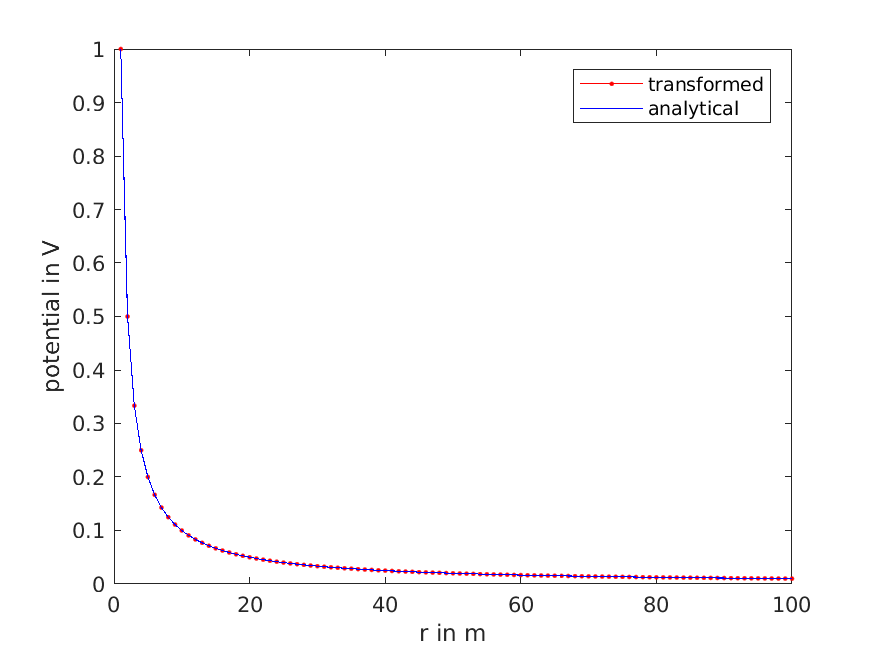

In [4]:
v = zeros(length(rp), 1);
for i = 1:length(rp)
    v(i) = 2 / pi * sum(w .* besselk(0, k * rp(i)));
end

plot(rp, v, 'r.-', rp, 1 ./ rp, 'b')
xlabel('r in m')
ylabel('potential in V')
legend('transformed', 'analytical')

In the following plot, we display the relative error of the approximation
$$
e(r) := \left(1 - \dfrac{\Phi(r)}{\Phi_a(r)}\right) \cdot 100 \%
$$
with respect to the (normalized) electrode distance.

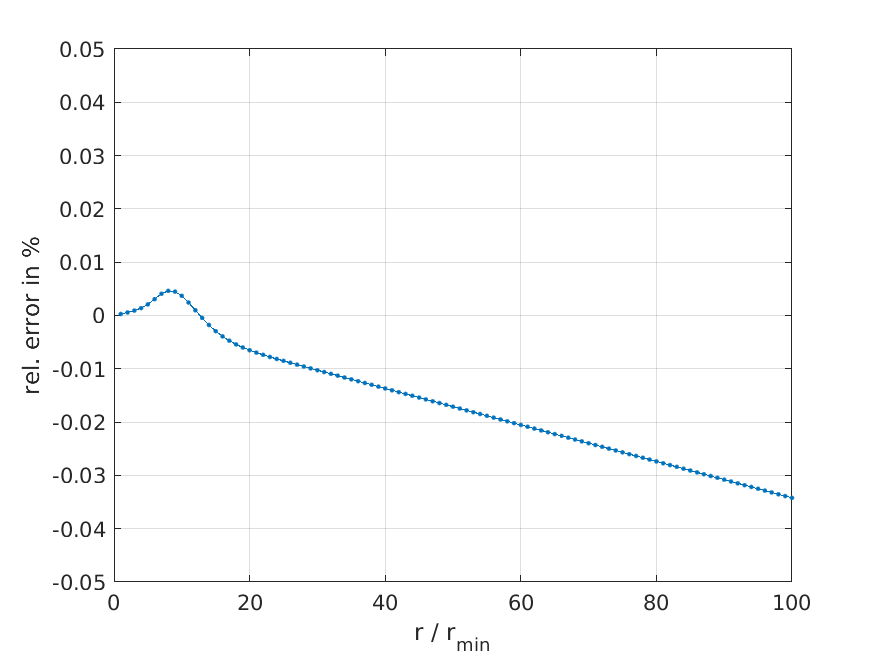

In [5]:
plot(rp / rmin, 100 * (1 - v .* rp), '.-');
grid();
xlabel('r / r_{min}');
ylabel('rel. error in %');
ylim([-0.05 0.05])